In [1]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 32 kB/s 
     |████████████████████████████████| 198 kB 53.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=88925f665852dcd2953f45e6c8174513a3499994d607ba79fe70ab24c7f47dbc
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

# RDD - Resilient Distributed Dataset

## 1 Create a Dataset

### 1.1 Using `parallelize()` create Dataset

In [ ]:
df = spark.sparkContext.parallelize([(1, 2, 3, 'a b c'),
(4, 5, 6, 'd e f'),
(7, 8, 9, 'g h i')]).toDF(['col1', 'col2', 'col3','col4'])

In [ ]:
df.show()

+----+----+----+-----+
|col1|col2|col3| col4|
+----+----+----+-----+
|   1|   2|   3|a b c|
|   4|   5|   6|d e f|
|   7|   8|   9|g h i|
+----+----+----+-----+



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
myData = spark.sparkContext.parallelize([(1,2), (3,4), (5,6), (7,8), (9,10)])

In [ ]:
myData.collect()

[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

### 1.2 Create data using `createDataFrame()`

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
Employee = spark.createDataFrame([
('1', 'Joe', '70000', '1'),
('2', 'Henry', '80000', '2'),
('3', 'Sam', '60000', '2'),
('4', 'Max', '90000', '1')],
['Id', 'Name', 'Sallary','DepartmentId']
)

In [ ]:
Employee.show()

+---+-----+-------+------------+
| Id| Name|Sallary|DepartmentId|
+---+-----+-------+------------+
|  1|  Joe|  70000|           1|
|  2|Henry|  80000|           2|
|  3|  Sam|  60000|           2|
|  4|  Max|  90000|           1|
+---+-----+-------+------------+



### 1.3 Read data from .csv file

In [ ]:
## set up SparkSession
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
df = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("/home/feng/Spark/Code/data/Advertising.csv", header=True)
df.show(5)
df.printSchema()

### 1.4 Read from Database

In [ ]:
## set up SparkSession
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
## User information
user = 'your_username'
pw = 'your_password'
## Database information
table_name = 'table_name'
url = 'jdbc:postgresql://##.###.###.##:5432/dataset?user='+user+'&password='+pw
properties ={'driver': 'org.postgresql.Driver', 'password': pw,'user': user}
df = spark.read.jdbc(url=url, table=table_name,
properties=properties)
df.show(5)
df.printSchema()

### 1.5 Read data from HDFS

In [ ]:
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import HiveContext

sc= SparkContext('local','example')
hc = HiveContext(sc)
tf1 = sc.textFile("hdfs://cdhstltest/user/data/demo.CSV")
print(tf1.first())
hc.sql("use intg_cme_w")
spf = hc.sql("SELECT * FROM spf LIMIT 100")
print(spf.show(5))

---

## 2. Spark Operations

### 2.1 Transformations

Transformations construct a new RDD from a previous one. 

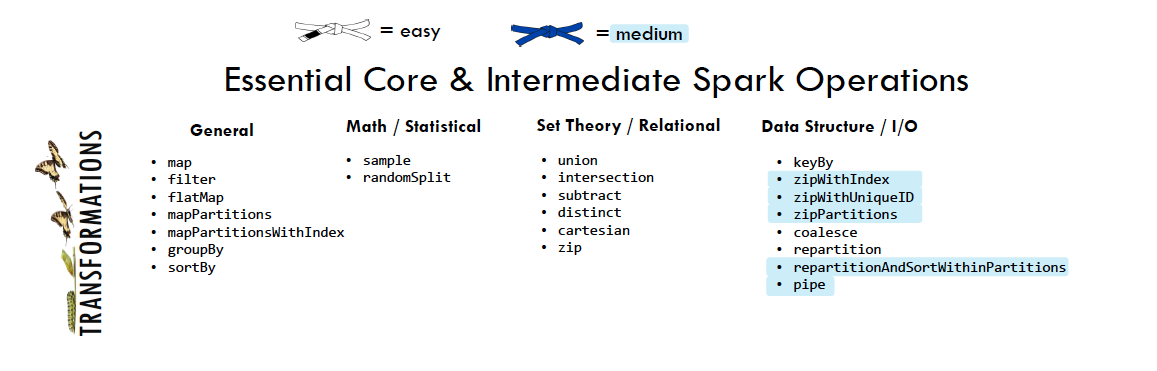

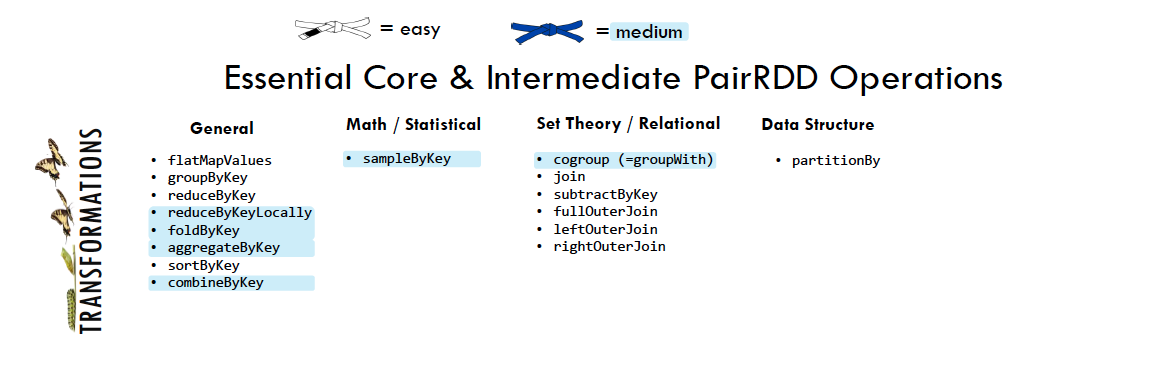

### 2.2 Spark Actions

Actions compute a result based on an RDD and either return it to the driver program or save it to an external storage systerm (HDFS)

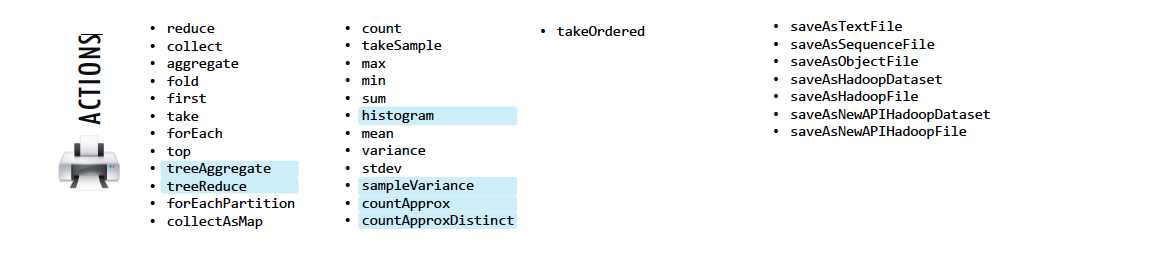

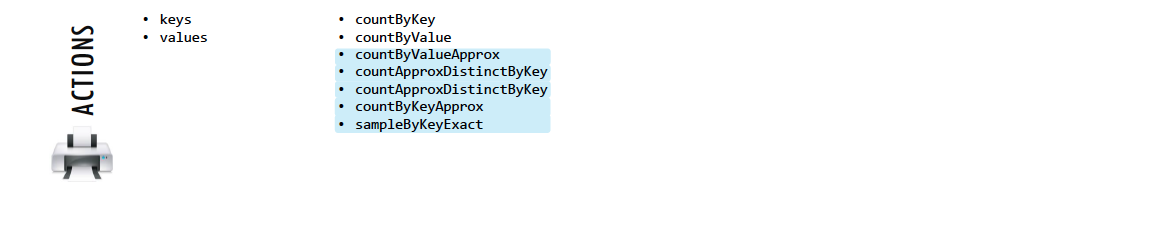

## 3 rdd.DataFrame vs. pd.DataFrame

### 3.1 Create DataFrame

#### 3.1.1 From List

In [ ]:
my_list = [['a', 1, 2], ['b', 2, 3],['c', 3, 4]]
col_name = ['A', 'B', 'C']

import pandas as pd
print(pd.DataFrame(my_list, columns=col_name)) 
spark.createDataFrame(my_list, col_name).show()

   A  B  C
0  a  1  2
1  b  2  3
2  c  3  4
+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
|  c|  3|  4|
+---+---+---+



#### 3.1.2 From Dict

In [ ]:
d = {'A': [0, 1, 0],
'B': [1, 0, 1],
'C': [1, 0, 0]}

pd.DataFrame(d)

,A,B,C
0,0,1,1
1,1,0,0
2,0,1,0


In [ ]:
import numpy as np
spark.createDataFrame(np.array(list(d.values())).T.tolist(),list(d.keys())).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  0|  1|  1|
|  1|  0|  0|
|  0|  1|  0|
+---+---+---+



### 3.2 Load DataFrame

#### 3.2.1 From DataBase

In [ ]:
# Save the user information in one .txt file
# runawayhorse001
# PythonTips

try:
  login = pd.read_csv(r'login.txt', header=None)
  user = login[0][0]
  pw = login[0][1]
  print('User information is ready')
except:
  print('Login information is not available')

In [ ]:
# Database information
host = '##.###.###.##'
db_name = 'db_name'
table_name = 'table_name'

conn = psycopg2.connect(host=host, database=db_name, user=user, password=pw)
cur = conn.cursor()
sql = """
select *
from {table_name}
""".format(table_name=table_name)
dp = pd.read_sql(sql, conn)

# connect to database
url = 'jdbc:postgresql://'+host+':5432/'+db_name+'?user='+user+'&password='+pw
properties ={'driver': 'org.postgresql.Driver', 'password': pw,'user': user}
ds = spark.read.jdbc(url=url, table=table_name, properties=properties)

#### 3.2.2 From .csv

In [ ]:
# pandas 
dp = pd.read_csv('Advertising.csv')
# rdd.DataFrame
ds = spark.read.csv(path='Advertising.csv',
                    sep=',',
                    encoding='UTF-8',
                    comment=None,
                    header=True,
                    inferSchema=True)

#### 3.3.3 From .json

In [ ]:
dp = pd.read_json("data/data.json")
ds = spark.read.json('data/data.json')

### 3.4 Comapre python and PySpark codes

##### 3.4.1 First 4 rows

In [ ]:
dp.head(4)
ds.show(4)

#### 3.4.2 Column names

In [ ]:
dp.columns
ds.columns

#### 3.4.3 Data Types

In [ ]:
dp.dtypes
ds.dtypes

#### 3.4.5 Fill Null

In [ ]:
my_list = [['male', 1, None], ['female', 2, 3],['male', 3, 4]]
dp = pd.DataFrame(my_list,columns=['A', 'B', 'C'])
ds = spark.createDataFrame(my_list, ['A', 'B', 'C'])

dp.head()
ds.show()

dp.fillna(-99)
ds.fillna(-99).show()

#### 3.4.6 Replace Values

In [ ]:
# chose specific col
dp.A.replace(['male', 'female'],[1, 0], inplace=True)

# Mixed type repalcements are not supported
ds.na.replace(['male','female'],['1','0']).show()

#### 3.4.7 Rename Columns

In [ ]:
# Rename all columns
dp.columns = ['a','b','c']
ds.toDF('a','b','c').show(4)

# Rename one or more columns
mapping = {'Newspaper':'C', 'Sales':'D'}
dp.rename(columns=mapping).head(4)

new_names = [mapping.get(col, col) for col in ds.columns]
ds.toDF(*new_names).show(4)

# Alternative way in PySpark
ds.withColumnRenamed("Newspaper", "Paper").show(4)

#### 3.4.8 Drop Columns

In [ ]:
drop_name = ["Newspaper", "Sales"]

# Pandas
dp.drop(drop_name, axos=1)

# PySpark
ds.drop(*drop_name)

#### 3.4.9 Filter

In [ ]:
# Pandas
dp = pd.read_csv('Advertising.csv')
dp[dp.Newspaper<20]
dp[(dp.Newspaper<20)&(dp.TV>100)].head(4)

# PySpark
ds = spark.read.csv(path='Advertising.csv',
header=True,
inferSchema=True)
ds[ds.Newspaper<20]
ds[(ds.Newspaper<20)&(ds.TV>100)].show(4)

#### 3.4.10 With New Column


In [ ]:
# Pandas
dp['tv_norm'] = dp.TV/sum(dp.TV)
dp['cond'] = dp.apply(lambda c: 1 if ((c.TV>100)&(c.Radio<40)) else 2 if c.Sales> 10 else 3,axis=1)

# PySpark
import pyspark.sql.functions as F
ds.withColumn('tv_norm', ds.TV/ds.groupBy().agg(F.sum("TV")).collect()[0][0])
ds.withColumn('cond',F.when((ds.TV>100)&(ds.Radio<40),1).when(ds.Sales>10, 2).otherwise(3)).show(4)

#### 3.4.11 Join

In [ ]:
leftp = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])
rightp = pd.DataFrame({'A': ['A0', 'A1', 'A6', 'A7'],
'F': ['B4', 'B5', 'B6', 'B7'],
'G': ['C4', 'C5', 'C6', 'C7'],
'H': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7])
lefts = spark.createDataFrame(leftp)
rights = spark.createDataFrame(rightp)

# Pandas
leftp.merge(rightp,on='A',how='left')

# PySpark
lefts.join(rights,on='A',how='left').orderBy('A',ascending=True).show()

#### 3.4.12 Concat Columns

In [ ]:
# Pandas
# %s is used as a placeholder for string values you want to inject into a formatted string
dp['concat'] = dp.apply(lambda x:'%s%s'%(x['col1'],x['col2']),axis=1)

# PySpark
ds.withColumn('concat',F.concat('col1','col2')).show()

#### 3.4.13 GroupBy

In [ ]:
# Pandas
dp.groupby(['col1']).agg({'col2':'min','col3':'mean'})

# PySpark
ds.groupBy(['col1']).agg({'col2': 'min', 'col3': 'avg'}).show()

#### 3.4.14 Pivot

In [ ]:
# Pandas
pd.pivot_table(dp, values='col3', index='col1', columns='col2', aggfunc=np.sum)

# PySpark
ds.groupBy(['col1']).pivot('col2').sum('col3').show()

#### 3.4.15 Window

In [ ]:
d = {'A':['a','b','c','d'],'B':['m','m','n','n'],'C':[1,2,3,6]}
dp = pd.DataFrame(d)
ds = spark.createDataFrame(dp)

# Pandas
dp['rank'] = dp.groupby('B')['C'].rank('dense',ascending=False)

# PySprak
from pyspark.sql.window import Window

w = Window.partitionBy('B').orderBy(ds.C.desc())
ds = ds.withColumn('rank',F.rank().over(w))

#### 3.4.16 rank vs. dense_rank

In [ ]:
d ={'Id':[1,2,3,4,5,6],
'Score': [4.00, 4.00, 3.85, 3.65, 3.65, 3.50]}
data = pd.DataFrame(d)
dp = data.copy()
ds = spark.createDataFrame(data)

# Pandas
dp['Rank_dense'] = dp['Score'].rank(method='dense',ascending =False)
dp['Rank'] = dp['Score'].rank(method='min',ascending =False)

# PySpark
import pyspark.sql.functions as F
from pyspark.sql.window import Window
w = Window.orderBy(ds.Score.desc())
ds = ds.withColumn('Rank_spark_dense',F.dense_rank().over(w))
ds = ds.withColumn('Rank_spark',F.rank().over(w))